In [1]:
import wget
url = 'https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta'
file = '../../current_complete_ncov_genomes.fasta'
wget.download(url, file)

'../../current_complete_ncov_genomes.fasta'

In [14]:
!/Users/saiswarooppamidi/documents/csc448/virulign

Usage: virulign [reference.fasta orf-description.xml] sequences.fasta
Optional parameters (first option will be the default):
  --exportKind [Mutations PairwiseAlignments GlobalAlignment PositionTable MutationTable]
  --exportAlphabet [AminoAcids Nucleotides]
  --exportWithInsertions [yes no]
  --exportReferenceSequence [no yes]
  --gapExtensionPenalty doubleValue=>3.3
  --gapOpenPenalty doubleValue=>10.0
  --maxFrameShifts intValue=>3
  --progress [no yes]
  --nt-debug directory
Output: The alignment will be printed to standard out and any progress or error messages will be printed to the standard error. This output can be redirected to files, e.g.:
   virulign ref.xml sequence.fasta > alignment.mutations 2> alignment.err


In [1]:
import pandas as pd
position_table = pd.read_csv('position_table.csv')


In [2]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,677,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677
unique,677,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT159707.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677


In [3]:
#consensus alignment
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
S_2_3       T
S_3_1       G
S_3_2       T
S_3_3       T
S_4_1       T
S_4_2       T
S_4_3       T
S_5_1       C
S_5_2       T
S_5_3       T
S_6_1       G
S_6_2       T
S_6_3       T
S_7_1       T
S_7_2       T
S_7_3       A
S_8_1       T
S_8_2       T
S_8_3       G
S_9_1       C
S_9_2       C
S_9_3       A
S_10_1      C
S_10_2      T
S_10_3      A
           ..
S_1264_1    G
S_1264_2    T
S_1264_3    G
S_1265_1    C
S_1265_2    T
S_1265_3    C
S_1266_1    A
S_1266_2    A
S_1266_3    A
S_1267_1    G
S_1267_2    G
S_1267_3    A
S_1268_1    G
S_1268_2    T
S_1268_3    C
S_1269_1    A
S_1269_2    A
S_1269_3    A
S_1270_1    T
S_1270_2    T
S_1270_3    A
S_1271_1    C
S_1271_2    A
S_1271_3    T
S_1272_1    T
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [4]:
position_table = position_table.set_index('seqid')

In [5]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
distance_from_concensus_seq_sorted

seqid
MT233522.1    82
MT308696.1    71
MT308694.1    53
MT263453.1    48
MT259284.1    33
MT293180.1    24
MT263436.1    10
MT293224.1    10
MT326129.1    10
MT259277.1    10
MT263431.1    10
MT293213.1    10
MT293196.1    10
MT326134.1     9
MT293200.1     9
MT293158.1     9
MT246456.1     9
MT293198.1     9
MT326176.1     8
MT320538.1     5
MT322421.1     4
MT334557.1     4
MT322422.1     4
MT012098.1     4
MT325596.1     4
MT322423.1     4
MT246482.1     3
MT326090.1     3
MT259249.1     2
MT263384.1     2
              ..
MT263425.1     0
MT263430.1     0
MT262912.1     0
MT326053.1     0
MT326052.1     0
MT263434.1     0
MT263435.1     0
MT263440.1     0
MT326042.1     0
MT326040.1     0
MT263404.1     0
MT326076.1     0
MT263400.1     0
MT263399.1     0
MT262913.1     0
MT262914.1     0
MT322403.1     0
MT262993.1     0
MT326088.1     0
MT263381.1     0
MT263382.1     0
MT263383.1     0
MT326086.1     0
MT326085.1     0
MT263388.1     0
MT326081.1     0
MT263395.1     0
MT263396

In [6]:
#only 10
subset_seqs = distance_from_concensus_seq_sorted[:10].index
subset_seqs

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT263436.1', 'MT293224.1', 'MT326129.1', 'MT259277.1'],
      dtype='object', name='seqid')

In [7]:
distances = {}
for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT233522.1,MT259277.1,MT259284.1,MT263436.1,MT263453.1,MT293180.1,MT293224.1,MT308694.1,MT308696.1,MT326129.1
MT233522.1,0,90,115,90,130,104,90,135,151,90
MT259277.1,90,0,43,2,58,32,2,63,79,0
MT259284.1,115,43,0,43,81,47,43,86,104,43
MT263436.1,90,2,43,0,58,32,0,63,79,2
MT263453.1,130,58,81,58,0,68,58,101,119,58
MT293180.1,104,32,47,32,68,0,32,77,93,32
MT293224.1,90,2,43,0,58,32,0,63,79,2
MT308694.1,135,63,86,63,101,77,63,0,22,63
MT308696.1,151,79,104,79,119,93,79,22,0,79
MT326129.1,90,0,43,2,58,32,2,63,79,0


In [8]:
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

In [9]:

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

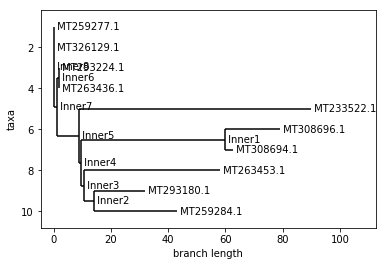

In [10]:
%matplotlib inline

from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [12]:
seq_additionalInfo = pd.read_csv('sequences_metadata.csv')
seq_additionalInfo 

,Accession,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29903,China,Homo sapiens,NaN,2019-12
1,MT422806,2020-05-04T00:00:00Z,Severe acute respiratory syndrome-related coro...,29903,USA: FL,Homo sapiens,NaN,2020-03-27
2,MT422807,2020-05-04T00:00:00Z,Severe acute respiratory syndrome-related coro...,29903,USA: FL,Homo sapiens,NaN,2020-03-27
3,MT215193,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,27871,Hong Kong,Canis lupus familiaris,NaN,2020-02-26
4,MT215194,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29764,Hong Kong,Homo sapiens,NaN,2020-02-24
5,MT215195,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29764,Hong Kong,Homo sapiens,NaN,2020-02-25
6,MT270814,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29764,Hong Kong,Canis lupus familiaris,NaN,2020-03-18
7,MT270815,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29764,Hong Kong,Homo sapiens,NaN,2020-03-16
8,MT276600,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29764,Hong Kong,Homo sapiens,NaN,2020-03-08
9,MT418880,2020-05-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29899,USA: VA,Homo sapiens,NaN,2020-04


In [24]:
# removing the .1 at the end of sequences
curr = []
for i in subset_seqs:
    curr.append(i[:-2])

currSeq = pd.DataFrame(curr,columns = ['Accession'])
sequence_data = pd.merge(currSeq,seq_additionalInfo,on = 'Accession')
sequence_data = sequence_data.set_index(['Accession'])
sequence_data

,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date
Accession,,,,,,,
MT233522,2020-03-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,29782,Spain: Valencia,Homo sapiens,NaN,2020-03-02
MT308696,2020-04-08T00:00:00Z,Severe acute respiratory syndrome-related coro...,29767,USA: MI,Homo sapiens,swab,2020-03-09
MT308694,2020-04-08T00:00:00Z,Severe acute respiratory syndrome-related coro...,29757,USA: MI,Homo sapiens,swab,2020-03-11
MT263453,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,29777,USA: WA,Homo sapiens,NaN,2020-03-24
MT259284,2020-03-30T00:00:00Z,Severe acute respiratory syndrome-related coro...,29432,USA: WA,Homo sapiens,NaN,2020-03-15
MT293180,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,29554,USA: WA,Homo sapiens,NaN,2020-03-17
MT263436,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,29846,USA: WA,Homo sapiens,NaN,2020-03-24
MT293224,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,29847,USA: WA,Homo sapiens,NaN,2020-03-18
MT326129,2020-04-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29895,USA,Homo sapiens,NaN,2020-03-20


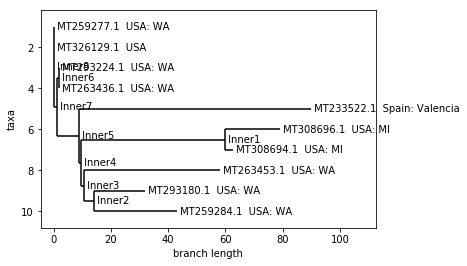

In [33]:
def getLabel(node,attr):
    if(str(node).find("Inner")<0):
        return str(node) + "  " + sequence_data.loc[str(node)[:-2],attr]
    else:
        return str(node)
Phylo.draw(tree,lambda n: getLabel(n,'Geo_Location'))

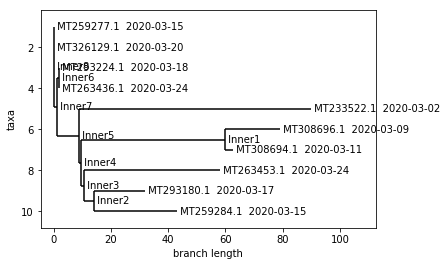

In [35]:
Phylo.draw(tree,lambda n: getLabel(n,'Collection_Date'))

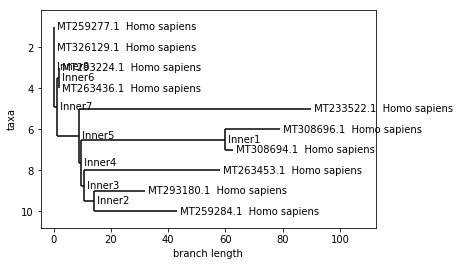

In [36]:
Phylo.draw(tree,lambda n: getLabel(n,'Host'))